In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, datasets ,utils

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [4]:
# rescale [0,255] to [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
from keras.utils import np_utils

# one hot encoding
num_classes = len(np.unique(y_train))
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

# shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Using TensorFlow backend.


In [6]:
# model layer creation
model = models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

W0909 17:52:59.874543 140266328045312 deprecation.py:506] From /home/anon/.local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0909 17:53:00.060990 140266328045312 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0909 17:53:00.112027 140266328045312 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [8]:
# train the model
model.fit(x_train, y_train, batch_size=125, epochs=50,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 29s 574us/sample - loss: 1.7960 - acc: 0.3386 - val_loss: 1.6879 - val_acc: 0.4007
Epoch 2/50
50000/50000 [==============================] - 29s 573us/sample - loss: 1.4276 - acc: 0.4839 - val_loss: 1.3460 - val_acc: 0.5021
Epoch 3/50
50000/50000 [==============================] - 29s 577us/sample - loss: 1.2747 - acc: 0.5436 - val_loss: 1.1285 - val_acc: 0.5934
Epoch 4/50
50000/50000 [==============================] - 29s 579us/sample - loss: 1.1695 - acc: 0.5842 - val_loss: 1.1246 - val_acc: 0.5990
Epoch 5/50
50000/50000 [==============================] - 29s 585us/sample - loss: 1.0919 - acc: 0.6177 - val_loss: 1.0443 - val_acc: 0.6382
Epoch 6/50
50000/50000 [==============================] - 29s 586us/sample - loss: 1.0377 - acc: 0.6383 - val_loss: 0.9858 - val_acc: 0.6484
Epoch 7/50
50000/50000 [==============================] - 29s 586us/sample - loss: 0.9864 - acc: 0.6570 

In [11]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

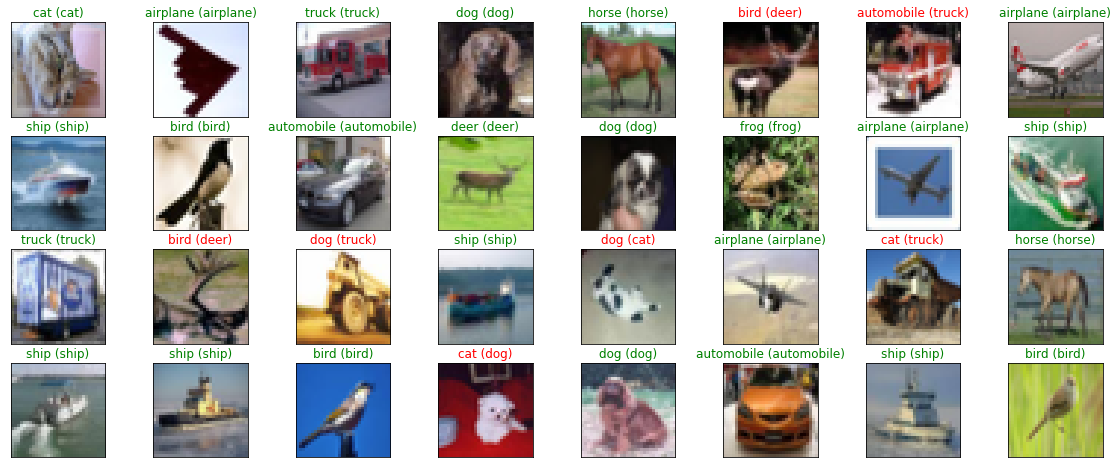

In [14]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))